# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [426]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

(500, 2) (500,)


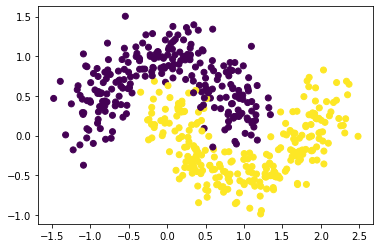

In [427]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
print(moons_points.shape, moons_labels.shape)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [428]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

def plot_decisions(estimator, points, labels, h=0.02, plot_title='', poly=None):
    # make a custom plot color theme
    cm = plt.cm.RdBu
    colors =["red", "gold", "green", "blue"]
    cm_bright = ListedColormap(colors)

    # to fill regions on the plot by colors, we need to make a grid on this plot
    # after that we will use our estimator to predict class label in each point of that grid

    # set the scale of our plot (add 0.5 to left, right, top and bottom sides)
    x_min, x_max = points[:, 0].min() - 0.5, points[:, 0].max() + 0.5
    y_min, y_max = points[:, 1].min() - 0.5, points[:, 1].max() + 0.5
    # plot grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # In case if we use Polynomial features, we have to transform not only train data,
    # but also data, that will be predicted.
    predicted_data = np.column_stack([xx.ravel(), yy.ravel()])
    if poly != None:
        predicted_data = poly.fit_transform(np.column_stack([xx.ravel(), yy.ravel()]))
    # predict class lables in each point of grid
    Z = estimator.predict(predicted_data)
    Z = Z.reshape(xx.shape)

    # plot the decision
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    # plot points 
    #! ATTENTION we assume, that we work with 2 features data
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cm_bright, alpha=1)

    plt.xlabel(f'$x_1$')
    plt.ylabel(f'$x_2$')
    if plot_title:
        plt.title(plot_title)

# In this fuction we plot proba decisions. 
# It means, that we use class labels propability instead of class labels itself.
# Can be apply to visualize a 2 classes classification
def plot_proba_decisions(estimator, points, labels, h=0.02, plot_title='', poly=None):
    # make a custom plot color theme
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    # to fill regions on the plot by colors, we need to make a grid on this plot
    # after that we will use our estimator to predict class label in each point of that grid

    # set the scale of our plot (add 0.5 to left, right, top and bottom sides)
    x_min, x_max =  points[:, 0].min() - 0.5,  points[:, 0].max() + 0.5
    y_min, y_max =  points[:, 1].min() - 0.5,  points[:, 1].max() + 0.5
    # plot grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    
    # In case if we use Polynomial features, we have to transform not only train data,
    # but also data, that will be predicted.
    predicted_data = np.column_stack([xx.ravel(), yy.ravel()])
    if poly != None:
        predicted_data = poly.fit_transform(np.column_stack([xx.ravel(), yy.ravel()]))
    
    # predict class lables in each point of grid
    Z = estimator.predict_proba(predicted_data)[:, 1]
    Z = Z.reshape(xx.shape)

    # plot the decision
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    # plot points 
    #! ATTENTION we assume, that we work with 2 features data
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cm_bright, alpha=1)

    plt.xlabel(f'$x_1$')
    plt.ylabel(f'$x_2$')
    if plot_title:
        plt.title(plot_title)

In [429]:
from sklearn.metrics import accuracy_score, f1_score

def OutputScores(estimator, predicted_data, true_lables):
    prediction = estimator.predict(predicted_data)
    print(f"Accuracy score is {round(accuracy_score(true_lables, prediction), 3)}")
    print(f"F1 score is {round(f1_score(true_lables, prediction, average='macro'), 3)}")

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# from mlxtend.plotting import plot_decision_regions

# make simple naive models
lr = LogisticRegression(random_state=0)
svm = SVC(kernel='linear', C=1.0)

### YOUR CODE HERE
# fit models with moons
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(kernel='linear')

Accuracy score is 0.856
F1 score is 0.856


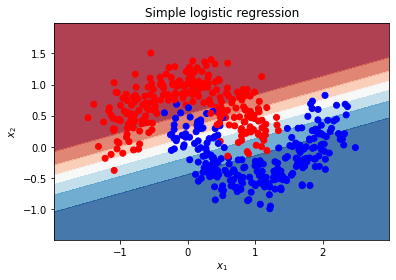

In [431]:
plot_proba_decisions(lr, moons_points, moons_labels, plot_title='Simple logistic regression')
OutputScores(lr, 
             moons_points, 
             moons_labels)

Accuracy score is 0.858
F1 score is 0.858


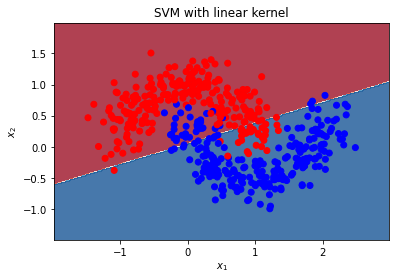

In [432]:
plot_decisions(estimator=svm, 
               points=moons_points, 
               labels=moons_labels, 
               plot_title='SVM with linear kernel')

OutputScores(svm, 
             moons_points, 
             moons_labels)

Очевидно, что линейные моделине могут справиться с линейно-неразделимой выборкой.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Accuracy score is 0.906
F1 score is 0.906


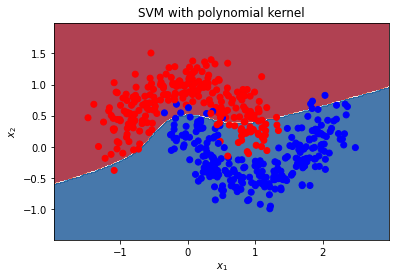

In [433]:
### YOUR CODE HERE

# Lets try SVM with different kernels and plot the decision
svm = SVC(kernel='poly', C=1.0)
svm.fit(moons_points, moons_labels)

plot_decisions(estimator=svm, 
               points=moons_points, 
               labels=moons_labels, 
               plot_title='SVM with polynomial kernel')

OutputScores(svm, 
             moons_points, 
             moons_labels)

Accuracy score is 0.974
F1 score is 0.974


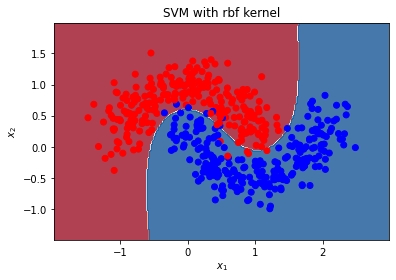

In [434]:
### YOUR CODE HERE
svm = SVC(kernel='rbf', C=1.0)
svm.fit(moons_points, moons_labels)

plot_decisions(estimator=svm, 
               points=moons_points, 
               labels=moons_labels, 
               plot_title='SVM with rbf kernel')

OutputScores(svm, 
             moons_points, 
             moons_labels)

Accuracy score is 0.648
F1 score is 0.648


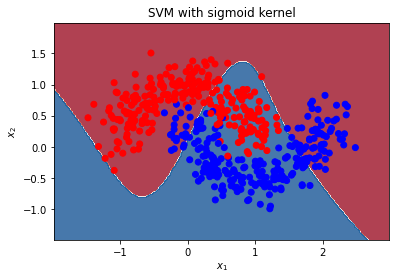

In [435]:
### YOUR CODE HERE

svm = SVC(kernel='sigmoid', C=1.0)
svm.fit(moons_points, moons_labels)

plot_decisions(estimator=svm, 
               points=moons_points, 
               labels=moons_labels, 
               plot_title='SVM with sigmoid kernel')

OutputScores(svm, 
             moons_points, 
             moons_labels)

Как мы видим, при подборе ядра наилучшим решением с наилучшей оценкой оказалось rbf ядро. Sigma ядро показало наихудшие результаты, это можно увидеть, как по графику, так и по оценке модели.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Accuracy score is 0.968
F1 score is 0.968


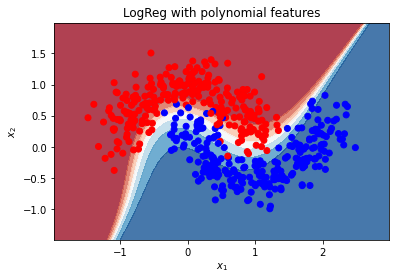

In [436]:
### YOUR CODE HERE

'''
However, we can make nonlinear models not only by SVM. 
In case of SVM we used nonlinear in the model itself, but we can also make nonlinear features.
By using PolynomialFeatures we can represent features in another dimention and build a linear model
in this dimention. So, in our base dimention model will be nonlinear. 
'''

# build a polynomial representer
poly = PolynomialFeatures(degree=3, include_bias=False)
# produse nonlinear fuatures using our base fitures
new_features = poly.fit_transform(moons_points)

# Build and fit model
lr = LogisticRegression(random_state=0)
lr.fit(new_features, moons_labels)

plot_proba_decisions(estimator=lr, 
               points=moons_points, 
               labels=moons_labels, 
               plot_title='LogReg with polynomial features',
               poly=poly)

OutputScores(lr, 
             new_features, 
             moons_labels)

Нелинейного разделения можно так же добиться с помощью линейной регрессии, если заложить нелинейность в сами данные. 

Степень полинома подбиралась в ручную, однако, 3ю степень можно объяснить тем, что граница разделения похожа на кубаболу (кубическую параболу).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

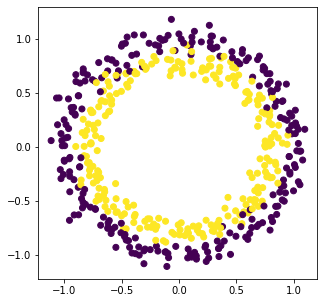

In [437]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

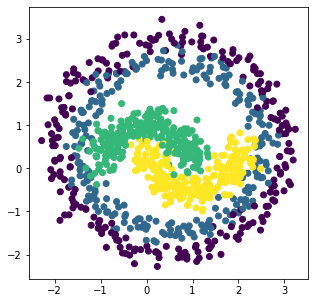

In [438]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Accuracy score is 0.932
F1 score is 0.932


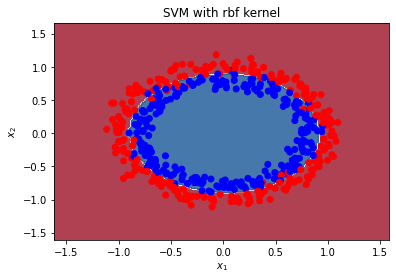

In [439]:
### YOUR CODE HERE
svm = SVC(kernel='rbf', C=1.0)
svm.fit(circles_points, circles_labels)

plot_decisions(svm, circles_points, circles_labels, plot_title='SVM with rbf kernel')

OutputScores(svm, 
             circles_points, 
             circles_labels)

Accuracy score is 0.942
F1 score is 0.942


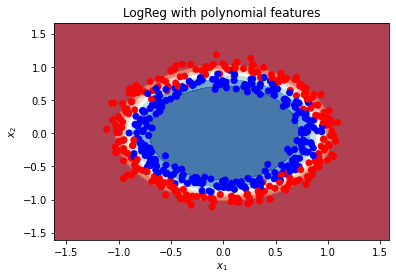

In [440]:
### YOUR CODE HERE
poly = PolynomialFeatures(degree=3, include_bias=False)
new_features = poly.fit_transform(circles_points)

lr = LogisticRegression(random_state=0)
lr.fit(new_features, circles_labels)

plot_proba_decisions(lr, 
                     circles_points, 
                     circles_labels, 
                     plot_title='LogReg with polynomial features', 
                     poly=poly)

OutputScores(lr, 
             new_features, 
             circles_labels)

Accuracy score is 0.921
F1 score is 0.921


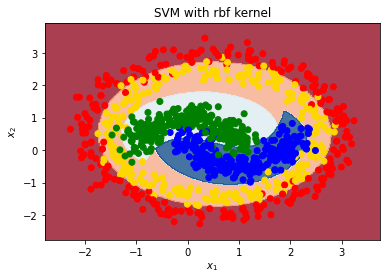

In [441]:
svm = SVC(kernel='rbf', C=1.0) # here too
svm.fit(points, labels)

plot_decisions(svm, points, labels, plot_title='SVM with rbf kernel')
OutputScores(svm, 
             points, 
             labels)

Accuracy score is 0.891
F1 score is 0.891


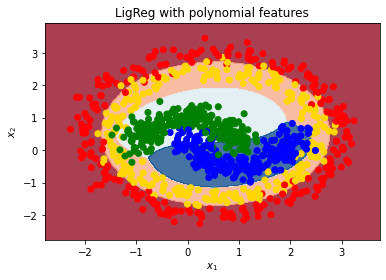

In [447]:
poly = PolynomialFeatures(degree=3, include_bias=False)
new_features = poly.fit_transform(points)

logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)
logreg.fit(new_features, labels)

plot_decisions(logreg, points, labels, plot_title='LigReg with polynomial features', poly=poly)
OutputScores(logreg, 
             new_features, 
             labels)

Accuracy score is 0.985
F1 score is 0.985


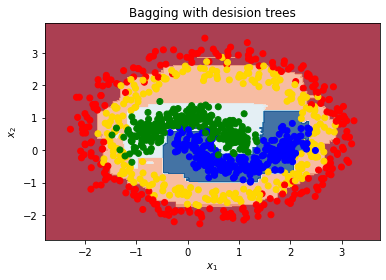

In [449]:
# Добавим ансабль деревьев чисто по приколу
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8)
clf = BaggingClassifier(tree, n_estimators=150, random_state=0, max_samples=points.shape[0])
clf.fit(points, labels)

plot_decisions(clf, points, labels, plot_title='Bagging with desision trees')
OutputScores(clf, 
             points, 
             labels)

В данном случае, лучше всего справляется svm. Это можно видеть по оценке модели. Бэггинг на деревьях мы здесь не учитываем, так как хотя бэггинг и защищает деревья от переобучения, в данном случае все равно велика вероятность, что модель просто запомнила обучающую выборку.